In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap

In [3]:
df = np.loadtxt('dataCircle.txt')

In [4]:
label_one = df[[np.arange(40)],:]
label_zero = df[[np.arange(40,len(df))], :]
label_one = np.reshape(label_one, (40,3))
label_zero = np.reshape(label_zero, (62,3))

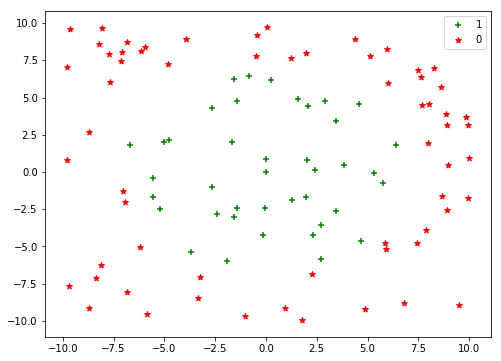

In [5]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(label_one.T[0],label_one.T[1], c='green', marker='+',  label = '1' )

plt.scatter(label_zero.T[0], label_zero.T[1], c='red', marker='*', label = '0')

plt.legend()
plt.show()

In [6]:
X = df.T[:-1]
X = X.T
y = df.T[2:]

In [7]:
y = np.reshape(y, (102))

In [8]:
clf = AdaBoostClassifier(n_estimators=200, random_state=0)
clf.fit(X,y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=200, random_state=0)

In [9]:
clf.feature_importances_

array([0.46, 0.54])

In [10]:
clf.predict([[-0.14444, -4.24898 ]])

array([1.])

In [11]:
clf.predict([[-8.72957, -9.11317]])

array([0.])

In [159]:
def plot_decision_boundary(classifier, X, y, N = 10, scatter_weights = np.ones(len(y)) , ax = None ):
    '''Utility function to plot decision boundary and scatter plot of data'''
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid( np.linspace(x_min, x_max, N), np.linspace(y_min, y_max, N))

    
    #Check what methods are available
    if hasattr(classifier, "decision_function"):
        zz = np.array( [classifier.decision_function(np.array([xi,yi]).reshape(1,-1)) for  xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] )
        
    # reshape result and plot
    Z = zz.reshape(xx.shape)
    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(1,1,1)
    ax.contourf(xx, yy, Z, 2, cmap='cool')
    ax.contour(xx, yy, Z,  2, cmap='cool')
    
    ax.scatter(label_one.T[0],label_one.T[1], c='black', marker='+',  label = '1' )

    plt.scatter(label_zero.T[0], label_zero.T[1], c='red', marker='*', label = '0')
    plt.legend()

In [160]:
boost = AdaBoostClassifier( base_estimator = DecisionTreeClassifier(max_depth = 2, max_leaf_nodes=2), 
                            algorithm = 'SAMME',n_estimators=26,learning_rate=1.0)

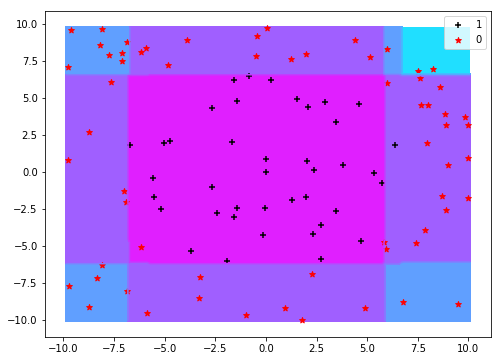

0.9803921568627451

In [164]:
boost.fit(X,y)
plot_decision_boundary(boost, X,y, N = 120)
plt.show()

boost.score(X,y)